<a href="https://colab.research.google.com/github/ounospanas/AIDL_A_02/blob/main/notebooks_solutions/AIDL_A02_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
words = 10000 #use the 10,000 most common words
max_len = 200 #use the first 200 words of a review
embedding_size = 64 #64-dimensional array
index_from=3   # word index offset, <PAD>:0, <START>:1, <UNK>:2.

# Load IMDB Data

In [3]:
(x_train, y_train), (x_val, y_val) = keras.datasets.imdb.load_data(num_words=words, index_from=index_from)
print(x_train.shape)
print(x_val.shape)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])


(25000,)
(25000,)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [4]:
word_to_id = keras.datasets.imdb.get_word_index()
word_to_id = {word:(index+index_from) for word,index in word_to_id.items()}
word_to_id["<PAD>"] = 0
word_to_id["<START>"] = 1
word_to_id["<UNK>"] = 2

id_to_word = {value:key for key,value in word_to_id.items()}
print(x_train[0])
print(' '.join(id_to_word[id] for id in x_train[0] ))

1646592/1641221 [==============================] - 0s 0us/step
<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole fi

In [5]:
#compute the number of the words per sentence
for i in range(10):
  print("The number of words in review {} is equal to: {}".format(i,len(x_train[i])))

The number of words in review 0 is equal to: 218
The number of words in review 1 is equal to: 189
The number of words in review 2 is equal to: 141
The number of words in review 3 is equal to: 550
The number of words in review 4 is equal to: 147
The number of words in review 5 is equal to: 43
The number of words in review 6 is equal to: 123
The number of words in review 7 is equal to: 562
The number of words in review 8 is equal to: 233
The number of words in review 9 is equal to: 130


In [6]:
# use keras.preprocessing to make all the senteces have equal number of words
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=max_len, padding='post')
x_val = keras.preprocessing.sequence.pad_sequences(x_val, maxlen=max_len, padding='post')

In [7]:
#should produce same values
for i in range(10):
  print("The number of words in review {} is equal to: {}".format(i,len(x_train[i])))

The number of words in review 0 is equal to: 200
The number of words in review 1 is equal to: 200
The number of words in review 2 is equal to: 200
The number of words in review 3 is equal to: 200
The number of words in review 4 is equal to: 200
The number of words in review 5 is equal to: 200
The number of words in review 6 is equal to: 200
The number of words in review 7 is equal to: 200
The number of words in review 8 is equal to: 200
The number of words in review 9 is equal to: 200


# LSTM

In [8]:
seed = 2
tf.random.set_seed(seed)
np.random.seed(seed)

inputs = keras.Input(shape=(None,), dtype="int32")
x = layers.Embedding(words, max_len)(inputs)  #define embedding layer with shape (30,000x64)

# add 2 LSTM layers with 64 neurons as hidden layer
x = layers.LSTM(64, return_sequences=True)(x) #layers.Bidirectional()
x = layers.Dropout(0.2)(x)
x = layers.LSTM(64)(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding (Embedding)        (None, None, 200)         2000000   
_________________________________________________________________
lstm (LSTM)                  (None, None, 64)          67840     
_________________________________________________________________
dropout (Dropout)            (None, None, 64)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 65    

In [9]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=32, epochs=5, validation_data=(x_val, y_val))

Epoch 1/5
782/782 [==============================] - 118s 140ms/step - loss: 0.5995 - accuracy: 0.6665 - val_loss: 0.5527 - val_accuracy: 0.7479
Epoch 2/5
782/782 [==============================] - 108s 138ms/step - loss: 0.5640 - accuracy: 0.7089 - val_loss: 0.7718 - val_accuracy: 0.6796
Epoch 3/5
782/782 [==============================] - 108s 138ms/step - loss: 0.3741 - accuracy: 0.8391 - val_loss: 0.3428 - val_accuracy: 0.8592
Epoch 4/5
782/782 [==============================] - 108s 138ms/step - loss: 0.2336 - accuracy: 0.9112 - val_loss: 0.3065 - val_accuracy: 0.8753
Epoch 5/5
782/782 [==============================] - 108s 138ms/step - loss: 0.1696 - accuracy: 0.9416 - val_loss: 0.3529 - val_accuracy: 0.8696


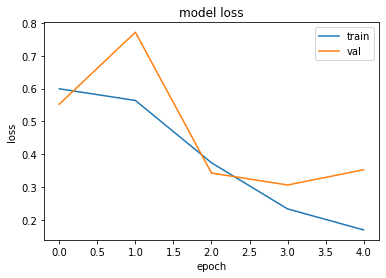

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

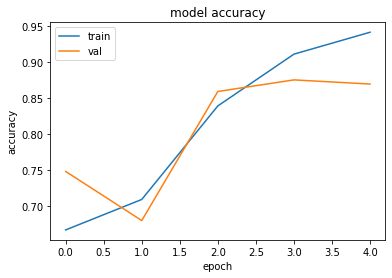

In [11]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [12]:
# Hint: lower case, split, tokenize (text to vec, use unk), add sos, pad
post_1 = "I really enjoyed Star Wars V!!! Amazing movie. ZUPER"
post_2 = "Star Wars episode IX has a poor scenario :("

In [13]:
import re
def normalizeString(s):
    s = s.lower().strip()
    s = re.sub(r"[^a-zA-Z]+", r" ", s)
    return s.split()

In [14]:
post_1 = normalizeString(post_1)
post_2 = normalizeString(post_2)

In [15]:
post_1.insert(0, '<START>')
post_2.insert(0, '<START>')

In [16]:
post_1_tokens = [word_to_id[id] if id in word_to_id else word_to_id['<UNK>'] for id in post_1]
post_2_tokens = [word_to_id[id] if id in word_to_id else word_to_id['<UNK>'] for id in post_2]

In [17]:
posts  = []
posts.append(np.asarray(post_1_tokens))
posts.append(np.asarray(post_2_tokens))

In [18]:
posts_padded = keras.preprocessing.sequence.pad_sequences(np.asarray(posts), maxlen=max_len, padding='post')

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [19]:
posts_padded = np.asarray(posts_padded)
posts_padded[posts_padded>=10000] = word_to_id['<UNK>']

In [20]:
preds = model.predict(np.asarray(posts_padded))

In [21]:
preds

array([[0.9246477 ],
       [0.33760136]], dtype=float32)